## 19 - Skew-T Parcel Path

[Youtube](https://www.youtube.com/watch?v=7QsBJTwuLvE)

In [1]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
import metpy.plots as plots

In [2]:
date = datetime(2017, 9, 10, 0)
station = 'BMX'
df = WyomingUpperAir.request_data(date, station)

In [3]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])

In [4]:
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)

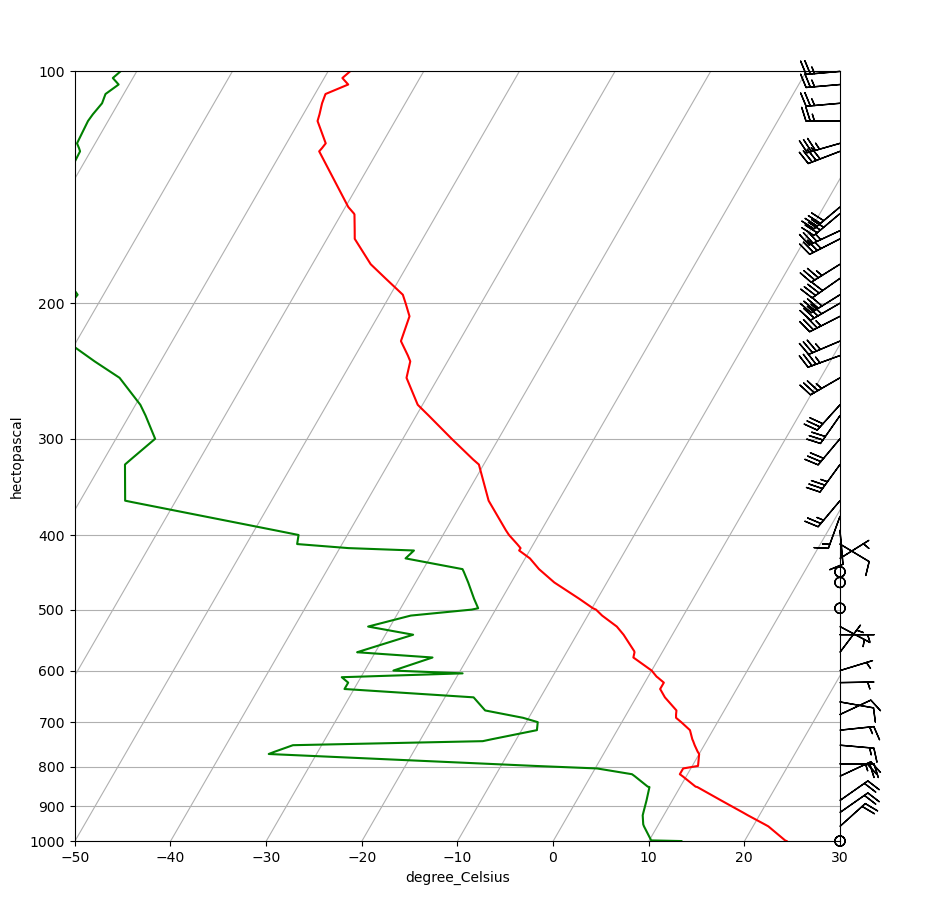

In [5]:
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 30)
skew.plot_barbs(p[idx], u[idx], v[idx])

In [6]:
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

In [7]:
parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])
parcel_path

/home/jessica/anaconda3/lib/python3.9/site-packages/metpy/calc/thermo.py:951: UserWarning: Duplicate pressure(s) [7.2 31.5] hPa provided. Output profile includes duplicate temperatures as a result.
  warnings.warn(f'Duplicate pressure(s) {unique[counts > 1]:~P} provided. '


Magnitude,[297.54999999999995 297.3796793981533 293.8330488714488 293.33142693034387 291.07862194785747 290.3661680399789 287.3974866077929 284.13064655741715 284.0619792672495 282.7953633346891 282.55723316432017 281.85138161865495 281.54357071519007 281.28976412250245 280.06262928594106 279.7681859371385 278.956945535332 278.44543998730995 278.20942991446356 277.0361798160337 275.99547688586154 275.4292892511837 274.99419811157645 274.46088764474973 273.3237783266215 272.7037481738805 271.568745211422 270.68848116871516 269.9348406785247 269.8737334056052 269.39594703310996 269.0051099051134 267.14028486232445 266.3788556608214 266.21570618213326 263.7918033491806 262.56032742672943 260.87630276791293 259.94879405395744 259.7391445916192 258.24510765937754 255.6100094287024 253.86310751754712 253.41305992034765 251.6097240695841 250.2677113546185 249.85600085871147 249.16023802154612 247.58629981571224 246.77637356527188 244.29801152507486 241.77442471035357 241.49097383726257 234.88590045276482 233.9652375095973 230.12734483125746 225.83205514635932 223.83507506895728 218.87858262874974 215.88358686874346 214.83169035597376 212.22906720664176 207.8247008992826 205.52416979267153 204.05081261097848 201.2335688415119 198.8208812843487 194.56797309777238 193.2104457502699 190.5623699771536 190.4203958112888 189.34696655213475 180.5568264944333 180.06783071682494 179.3280365798043 175.94380019378752 174.94002686695146 173.29435230135337 171.9307215683833 170.5394827756191 169.5959779129488 168.63915971005974 167.42371242213065 163.16913398269915 156.90994342821804 155.92131544986722 155.80397115524212 152.300403196212 149.43635752326406 149.17504733455618 147.3129946787197 145.25036709792892 144.19099435640328 143.1843784694491 141.93777194879186 141.1914970657094 140.05324535962095 139.28136745125016 138.34076633327285 137.30340451911127 135.4185512610865 133.98204565148654 133.55212960553837 131.70757905944095 129.8887128052936 128.29101031622912 128.09974471711953 126.4443846069377 126.34530961410873 124.63048699387373 122.9608124457473 121.23244927313134 121.23244927313134 119.66791265689405 119.55418667190112 118.75042593897219 117.93283049037767 117.22057963992923 116.37570530739812 115.26638978116917 111.76745861031905 110.39924233689288 110.26006872838929 106.47630674789649 105.86347421646087 104.6104863905396 103.15448829165189 100.43137939936227 99.17971325976389 96.16017774905522 95.36705247346973 94.1455133548489 92.8830129400936 91.79715641710753 91.57609020955961 90.4502242927411 88.8126072240981 88.3305715641169 87.34627157294238 85.8156729347256 81.65728826545427 79.52106888550516 79.52106888550516]
Units,kelvin


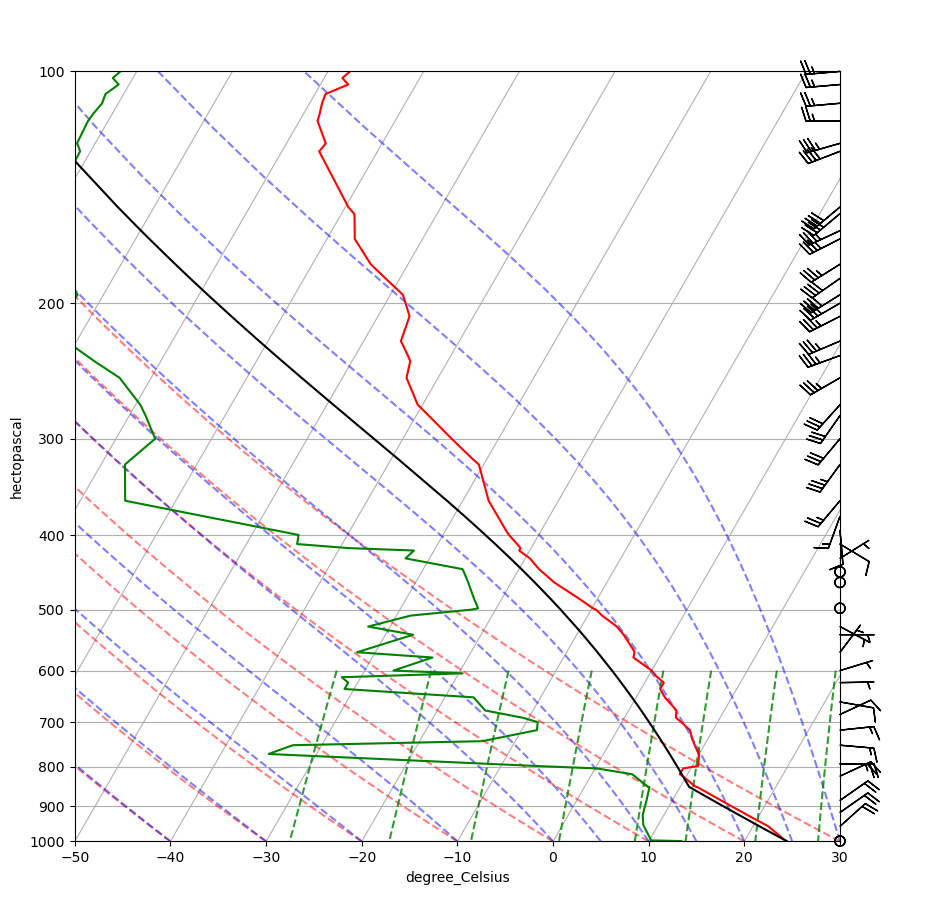

In [8]:
skew.plot(p, parcel_path, color = 'k')
fig

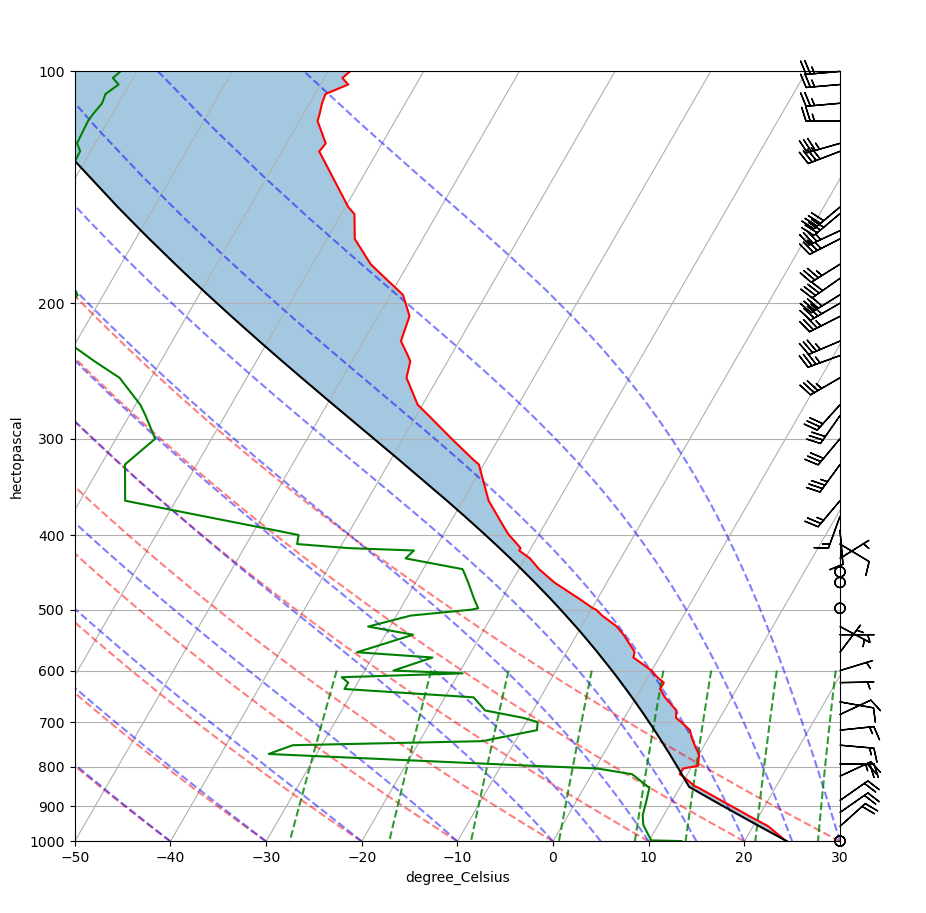

In [9]:
skew.shade_cape(p, T, parcel_path)
skew.shade_cin(p, T, parcel_path)
fig